
INTRODUCTION

The purpose of this project is to compare the precipitation of Seattle, Washington, with the precipitation patterns of Detroit, Michigan, to determine whether it rains more in Seattle than in Detroit.

In the notebook below, we will use the data science methodology to clean, process, and analyze historical weather data. The data for both cities were obtained from the archive of the National Centers for Environmental Information, a U.S. government authority for environmental data.

Using the collected data, we aim to provide a definitive answer to the question of whether it rains more in Seattle than in Detroit. The analysis process will include inspecting the dataset, cleaning it to ensure consistent data formats and no missing values (NaNs), merging the datasets, and applying statistical tools to perform both visual and quantitative analyse

Note: Our data was downloaded from the NOAA(National Oceanic and Atmospheric Adminstration) website (https://www.ncei.noaa.gov/cdo-web/search) and uploaded to our GitHub repository. The raw data was then imported into this notebook directly from GitHub(link provided in code).

Before working with a dataset in Jupyter notebook, it is important to import key Python libraries that make data analysis and visualization easier. 
The libraries we will use to work with our dataset include:
- pandas: used for data manipiulation and analysis. It provides powerful data structures like DataFrames for handling tabular data efficiently.
- numpy: used for numerical and mathematical operations, especially when working with arrays and performing vectorized computations.
- matplotlib.pyplot:  used for numerical and mathematical operations, especially for working with arrays and performing vectorized computations. 
- seaborn: this is built on top of matplotlib, it is used for creating more attractive and statistical visualizations with simpler syntax.

The line of code sns.set_style("whitegrid") is used to set the overall appearance of seaborn plots. 

In [643]:
#importing all important libraries and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style("whitegrid")

To achieve this, we will compare the precipitation data for both cities.

Before performing any analysis, we first need to import our datasets.
These datasets were obtained from the National Centers for Environmental Information (NCEI) webpage, which provides reliable climate and weather records.

We downloaded the data files for both Seattle and Detroit from the NCEI and uploaded them to our GitHub repository. We then retrieved the raw data links from GitHub and passed each link to the pandas function read_csv(), which reads the CSV files and stores the data in the variables df_seattle and df_detroit.

In [644]:
#loading the data for seattle

df_seattle = pd.read_csv('https://raw.githubusercontent.com/kembaoak/weather/refs/heads/main/data/seattle_rain.csv')

Reading our data:

In [645]:
#loading in data for detroit
df_detroit = pd.read_csv('https://raw.githubusercontent.com/kembaoak/weather/refs/heads/main/data/detroit_rain.csv')

To view the data in our tables, we use the .head() function with our DataFrames.
This function displays the first five rows of the dataset by default, allowing us to quickly preview the structure, column names, and sample values of the data.

In [646]:
#viewing contents of the tables for seattle data using .heads()
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


The output shows first 5 records of our data set including the column titles. This basically allows us to view our table

To preview data for our df_detroit dataframe:

In [647]:
#viewing contents of the tables for detroit data using .heads() function
df_detroit.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT08
0,USW00014822,"DETROIT CITY AIRPORT, MI US",42.40725,-83.00899,189.8,2018-01-01,8.50,1140,0.0,NaN,15,-2,300,290,18.1,23.9,NaN,NaN,NaN,NaN
1,USW00014822,"DETROIT CITY AIRPORT, MI US",42.40725,-83.00899,189.8,2018-01-02,13.42,1729,0.0,NaN,12,2,240,250,21.0,27.1,NaN,NaN,NaN,NaN
2,USW00014822,"DETROIT CITY AIRPORT, MI US",42.40725,-83.00899,189.8,2018-01-03,11.86,309,0.0,NaN,16,2,240,240,21.0,29.1,NaN,NaN,NaN,NaN
3,USW00014822,"DETROIT CITY AIRPORT, MI US",42.40725,-83.00899,189.8,2018-01-04,11.41,1136,0.0,NaN,16,0,330,310,19.9,28.0,NaN,NaN,NaN,NaN
4,USW00014822,"DETROIT CITY AIRPORT, MI US",42.40725,-83.00899,189.8,2018-01-05,9.17,1505,0.0,NaN,7,-3,340,330,17.0,25.1,NaN,NaN,NaN,NaN


To view more rows of a DataFrame, we can specify the number of rows we want to see by passing a number as a parameter to the .head() function. In our case, we pass 10 to preview first 10 rows. 

In [648]:
#to view 10 rows of the data set
df_seattle.head(10)


,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN
5,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/6/18,NaN,NaN,0.57,NaN,NaN,NaN,NaN
6,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/7/18,NaN,NaN,0.23,NaN,NaN,NaN,NaN
7,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/8/18,NaN,NaN,0.41,NaN,NaN,NaN,NaN
8,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",3/12/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
9,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",3/13/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN


The output above displays the first 10 rows of our dataset, allowing us to quickly inspect the structure and sample values of the data before performing any analysis.

In [649]:
#To view 10 rows of the data set of detroit
df_detroit.head(10)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT08
0,USW00014822,"DETROIT CITY AIRPORT, MI US",42.40725,-83.00899,189.8,2018-01-01,8.50,1140,0.00,NaN,15,-2,300,290,18.1,23.9,NaN,NaN,NaN,NaN
1,USW00014822,"DETROIT CITY AIRPORT, MI US",42.40725,-83.00899,189.8,2018-01-02,13.42,1729,0.00,NaN,12,2,240,250,21.0,27.1,NaN,NaN,NaN,NaN
2,USW00014822,"DETROIT CITY AIRPORT, MI US",42.40725,-83.00899,189.8,2018-01-03,11.86,309,0.00,NaN,16,2,240,240,21.0,29.1,NaN,NaN,NaN,NaN
3,USW00014822,"DETROIT CITY AIRPORT, MI US",42.40725,-83.00899,189.8,2018-01-04,11.41,1136,0.00,NaN,16,0,330,310,19.9,28.0,NaN,NaN,NaN,NaN
4,USW00014822,"DETROIT CITY AIRPORT, MI US",42.40725,-83.00899,189.8,2018-01-05,9.17,1505,0.00,NaN,7,-3,340,330,17.0,25.1,NaN,NaN,NaN,NaN
5,USW00014822,"DETROIT CITY AIRPORT, MI US",42.40725,-83.00899,189.8,2018-01-06,5.59,1050,0.00,NaN,9,-4,320,330,14.1,19.9,NaN,NaN,NaN,NaN
6,USW00014822,"DETROIT CITY AIRPORT, MI US",42.40725,-83.00899,189.8,2018-01-07,12.30,1943,0.00,NaN,30,-3,220,220,23.0,31.1,NaN,NaN,NaN,NaN
7,USW00014822,"DETROIT CITY AIRPORT, MI US",42.40725,-83.00899,189.8,2018-01-08,12.75,1339,0.09,NaN,37,29,230,250,19.9,25.1,NaN,NaN,NaN,NaN
8,USW00014822,"DETROIT CITY AIRPORT, MI US",42.40725,-83.00899,189.8,2018-01-09,5.82,112,0.00,NaN,37,27,170,260,12.1,17.0,NaN,NaN,NaN,NaN
9,USW00014822,"DETROIT CITY AIRPORT, MI US",42.40725,-83.00899,189.8,2018-01-10,8.05,2058,0.06,NaN,47,24,210,210,19.9,27.1,NaN,NaN,NaN,NaN


Note: When we view the data using .head(), we can see that df_seattle has fewer columns than df_detroit. This difference arises from how the data was selected when downloading from the NCEI website. We were prompted to choose the specific data we wanted to include, which is why df_detroit may have more columns.

This is not a problem, as we can always select the columns we want to work with. As long as both DataFrames contain the necessary data for our analysis, we are good to proceed.

We want to see the names of the columns that we have for each dataframes. The .columns attribute in pandas is used to access the column names of a DataFrame.
This returns an Index object containing the names of all columns in df_seattle.

It is useful for inspecting, selecting, or renaming columns before performing any analysis.

In [650]:
df_seattle.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'WESD', 'WESF'],
      dtype='object')

In [651]:
df_detroit.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'AWND',
       'PGTM', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5',
       'WT01', 'WT02', 'WT03', 'WT08'],
      dtype='object')

output shows all columns on the detroit and seattle dataset.

To view a concise summary of each DataFrame, we use the .info() method.

When called, it shows:

The number of records (non-null values) in each column.

The data type of each column (e.g., int64, float64, object).

This is useful for quickly checking the structure of the dataset and identifying missing data or incorrect data types before analysis.

In [652]:
#the Info method can be used to check the data types, size of data frame and the number of missing values

df_seattle.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


The output shows that the DataFrame has 1658 rows (as indicated by the RangeIndex) and 10 columns (0–9).

The columns STATION, NAME, and DATE each have 1658 non-null values, meaning there are no missing entries for these key columns, which are the ones we are primarily interested in.

However, we notice a few important points:

DATE is stored as an object, which could be problematic for analysis. Converting it to a datetime type is recommended.

PRCP, another column of interest, has 1636 non-null values, meaning there are 22 missing entries.

It is important to handle these null values before performing any statistical analysis to ensure accurate results.


In [653]:
df_detroit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    1825 non-null   object 
 1   NAME       1825 non-null   object 
 2   LATITUDE   1825 non-null   float64
 3   LONGITUDE  1825 non-null   float64
 4   ELEVATION  1825 non-null   float64
 5   DATE       1825 non-null   object 
 6   AWND       1824 non-null   float64
 7   PGTM       1825 non-null   int64  
 8   PRCP       1813 non-null   float64
 9   TAVG       0 non-null      float64
 10  TMAX       1825 non-null   int64  
 11  TMIN       1825 non-null   int64  
 12  WDF2       1825 non-null   int64  
 13  WDF5       1825 non-null   int64  
 14  WSF2       1825 non-null   float64
 15  WSF5       1825 non-null   float64
 16  WT01       78 non-null     float64
 17  WT02       2 non-null      float64
 18  WT03       13 non-null     float64
 19  WT08       48 non-null     float64
dtypes: float

The output shows that the DataFrame has 1825 entries (as indicated by the RangeIndex) and 20 columns (0–9).

The columns we are concerned with -  STATION, NAME, and DATE each have 1825 non-null values, meaning there are no missing entries for these key columns, which are the ones we are primarily interested in.

However, we notice a few important points:

DATE is stored as an object, which could be problematic for analysis. Converting it to a datetime type is recommended.

PRCP, another column of interest, has 1813 non-null values, meaning there are some missing entries.

It is important to handle these null values before performing any statistical analysis to ensure accurate results.

To preview all the station identifiers in the dataset and determine whether the data comes from a single weather station or multiple stations, we use the command below and pass the name of the column — in this case, the STATION column:

In [654]:
#To access one particular column in our data set. 

df_detroit['STATION']

0       USW00014822
1       USW00014822
2       USW00014822
3       USW00014822
4       USW00014822
           ...     
1820    USW00014822
1821    USW00014822
1822    USW00014822
1823    USW00014822
1824    USW00014822
Name: STATION, Length: 1825, dtype: object

From the output, we can see that our data comes from a single weather station, identified as USW00014822.

The output from df_detroit['STATION'] shows a long list of station identifiers, and since some rows are hidden, we can’t easily tell if any station identifiers are missing or if multiple stations are included.

To make this easier, we use the .unique() method, which returns only the unique station identifiers in the column.

In [655]:
#To obtain the number of unique stations
df_detroit['STATION'].unique()

array(['USW00014822'], dtype=object)

From the output, we can confirm that the dataset contains only one station identifier, USW000148226.

If we want to find the number of unique station identifiers in the dataset, we can use the .nunique() function with our DataFrame.

In [656]:
#To determine the number of unique elements
df_detroit['STATION'].nunique()


1

In [657]:
df_seattle['STATION'].nunique()

1

The outputs for the Seattle and Detroit dataframes indicate that each dataframe contains measurements sourced from only one station, rather than multiple stations within each region.

Recall that when we used the .info() function, we observed that the date column in both dataframes had the data type object. This can lead to issues if we try to make comparisons while the dates are stored as strings, because strings are compared lexicographically rather than chronologically. As a result, comparing two dates in this format can produce incorrect results. For example, "2025-10-07" < "2025-2-01" evaluates as False as strings, even though October 7, 2025, is actually after February 1, 2025. Therefore, it is important to convert the date column to a proper datetime type so that sorting, filtering, and other date-based operations work correctly.

To view our Date column, we write the following code:
Note: the dtype indicates that it is an object. 

In [658]:
#To examine the date column
df_seattle['DATE']

0         1/1/18
1         1/2/18
2         1/3/18
3         1/4/18
4         1/5/18
          ...   
1653    12/27/22
1654    12/28/22
1655    12/29/22
1656    12/30/22
1657    12/31/22
Name: DATE, Length: 1658, dtype: object

In [659]:
#To examine the date column
df_detroit['DATE']

0       2018-01-01
1       2018-01-02
2       2018-01-03
3       2018-01-04
4       2018-01-05
           ...    
1820    2022-12-27
1821    2022-12-28
1822    2022-12-29
1823    2022-12-30
1824    2022-12-31
Name: DATE, Length: 1825, dtype: object

Lets see what happens when we try to use the .max() function which returns the maximum value or in this case a string object. 

In [660]:
#NOTE: Obtaining the earliest and latest date could lead to incorrect answers as our dates are strings and not in correct date format
df_seattle['DATE'].max()

'9/9/22'

The output shows '9/9/22' because python treats the values as strings, so it performs lexicographical comparison(like dictionary order), not chronological. Because it compares character by character '12/31/2022' which is supposed to be the max value will seem lesser than '9/9/22'

To see what happened if we called .min() with our dataframe

In [661]:
df_seattle['DATE'].min()

'1/1/18'

You can see we got the correct min value but this is not in chronological order but instead in lexicographical order - because it starts with 1, which is smaller than the first character of any other string in the column, it is the minimum string. 

max() and min() are explained below including the possible outputs. 

In [662]:
df_detroit['DATE'].max()

'2022-12-31'

In [663]:
df_detroit['DATE'].min()

'2018-01-01'

See above for explanation. We see however that Detoit does return the correct max values as compared to Seattle which returned the wrong date. Lets figure out why

To convert a DATE column from an object (string) type to a proper datetime type in pandas, we use the pd.to_datetime() function. This ensures that all entries in the column are recognized as dates, enabling correct chronological operations such as sorting, filtering, and comparisons.We can also specify the date format. 

In [664]:
# converting DATE to datetime for Seattle rain data
#convert the existing string format of date to the correct date and time format

df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'], errors='coerce')

print(df_seattle['DATE'].dtype)

#the result of the conversion is that the entire date column will contain records in the correct date and time format

datetime64[ns]


/var/folders/fl/1v09j2_57fg6drj48nv618w00000gn/T/ipykernel_65988/1683154753.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'], errors='coerce')


In [665]:
# converting DATE to datetime for detroit datafram
#convert the existing string format of date to the correct date and time format
df_detroit['DATE'] = pd.to_datetime(df_detroit['DATE'], errors='coerce')


#the result of the conversion is that the entire date column will contain records in the correct date and time format

For line 46 & 47, the selected column is replaced with dates that have been corrected to the accurate datetime format rather than string. Nothing is printed but new changes are assigned to our selected columns. 

To view summary of DATE column

In [666]:
#To view our DATE column
df_seattle['DATE']

#outputs column with our dates

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1653   2022-12-27
1654   2022-12-28
1655   2022-12-29
1656   2022-12-30
1657   2022-12-31
Name: DATE, Length: 1658, dtype: datetime64[ns]

From the output, we can see a summary of our date column showing the first 5 records and last 5 records.

To view a summary of our date column

In [667]:
#To view our DATE column for detroit
df_detroit['DATE']

#outputs column with our dates

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1820   2022-12-27
1821   2022-12-28
1822   2022-12-29
1823   2022-12-30
1824   2022-12-31
Name: DATE, Length: 1825, dtype: datetime64[ns]

From the output, we can see a summary of our date column showing the first 5 records and last 5 records.
We can also see that the data type has changed from object to datetime format.

Output shows out date columns with the first 5 earliest dates and the latest 5 dates. 

Perform max and min operations to return the earliest and latest date in our dataframe.

In [668]:
#to perform multiple aggregations - min and max
df_seattle['DATE'].agg(['min', 'max'])
#outputs the earliest and latest dates

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

df_detroit['DATE'] selects the DATE column from the DataFrame df_detroit. 
.agg(['min','max']) allows us to apply one or more functions to a series or Dataframe
min returns the earliest date in the series
max returns the latest date in the series

In [669]:
#to perform multiple aggregations - min and max
df_detroit['DATE'].agg(['min', 'max'])
#outputs the earliest and latest dates

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

The output now correctly reflects the chronological order of the data. We can also observe that the maximum date value is different from what we obtained earlier when the DATE column was still of object (string) type, highlighting the importance of converting dates to the correct type for accurate comparisons.


To create a line plot for the Seattle dataset, we use Seaborn’s lineplot to visualize precipitation over the period of interest. First, plt.figure(figsize=(20,5)) creates a figure with a width of 20 inches and a height of 5 inches. Then, sns.lineplot(data=df_detroit, x='DATE', y='PRCP') plots a line chart where the x-axis represents the date and the y-axis represents precipitation (PRCP). The axis labels can be customized with font sizes, and plt.tick_params(labelsize=15) adjusts the size of the tick labels on both axes to 15 points. Finally, plt.show() displays the resulting line plot.


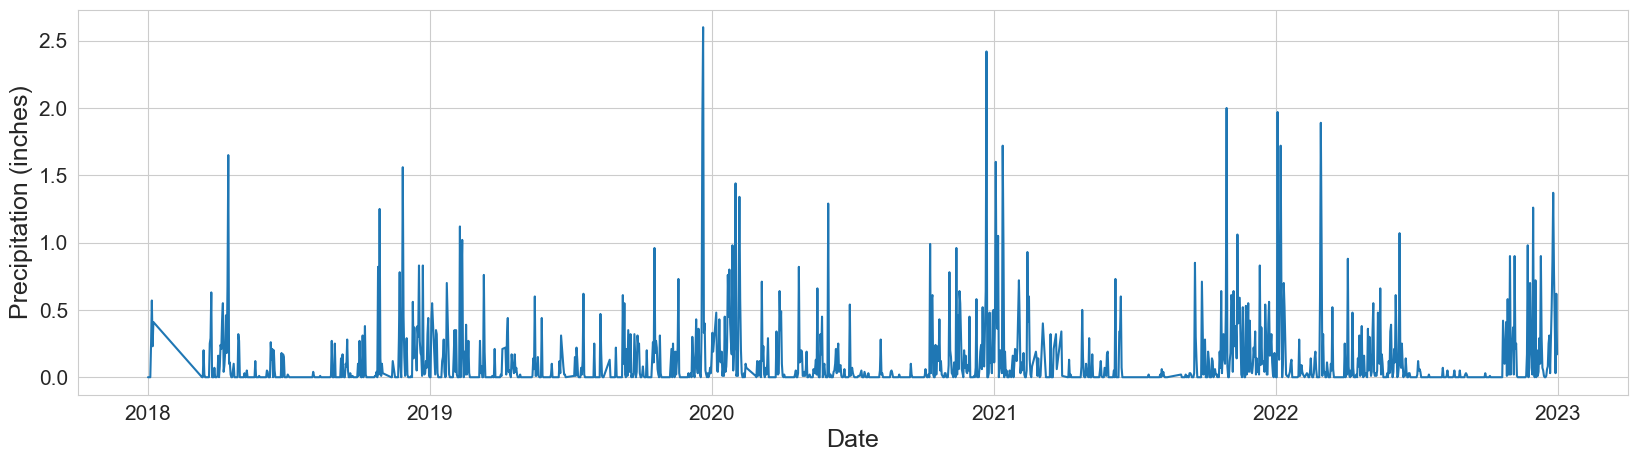

In [670]:
plt.figure(figsize = (20,5))
sns.lineplot(data=df_seattle, x='DATE', y='PRCP')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)
plt.show()

#outputs a graph taking account of inputs as provided

The line plot is displayed, and we can see that most days are represented. However, in 2018, there is a slanting line connecting some points, which indicates that data for certain days are likely missing. The points under the slanted line correspond to missing dates. We will need to develop a process to identify and handle these missing dates.

To create a line plot for the detroit dataset, we use Seaborn’s lineplot to visualize precipitation over the period of interest. First, plt.figure(figsize=(20,5)) creates a figure with a width of 20 inches and a height of 5 inches. Then, sns.lineplot(data=df_detroit, x='DATE', y='PRCP') plots a line chart where the x-axis represents the date and the y-axis represents precipitation (PRCP). Axis labels can be customized with font sizes, and plt.tick_params(labelsize=15) adjusts the size of the tick labels on both axes to 15 points. Finally, plt.show() displays the resulting line plot.

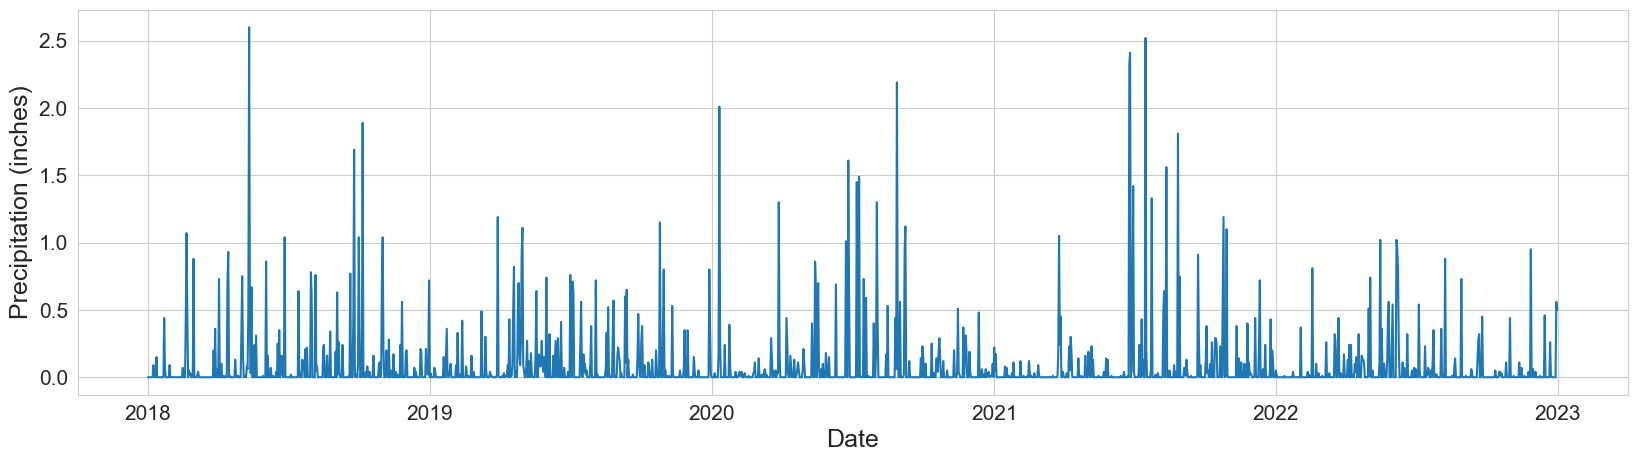

In [671]:

plt.figure(figsize = (20,5))
sns.lineplot(data=df_detroit, x='DATE', y='PRCP')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)
plt.show()

#outputs a graph taking account of inputs as provided

The line plot displays detroit precipitation data from 2018 through the end of 2022. The plot shows a continuous line, indicating that there are no missing dates or breaks in the dataset.

To allow for easy plotting and simplify analaysis, we can have both data sets in a single dataframe 'df' which makes it easier to plot, calculate differences, correlations, or perform other analyses without switching between two seperate dataframes. 
By aligning detroit and Seattle precipitation data on the same DATE column, we can directly compare precipitation on the same day across the two locations.

In [672]:
#merge allows us to combine the two data frames
# how = outer indicates an outer merge allows for all rows of both dataframes to be combined and missing values are filled with NaN
#we also indicate that the columns we need are DATE and PRCP
df = df_detroit[['DATE','PRCP']].merge(df_seattle[['DATE', 'PRCP']], on='DATE', how='outer')



The two dataframes are merged and assigned to a new dataframe 'df'.

To have a preview of our new data frame 'df' we use .head()

In [673]:
df.head()

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.0,0.00
1,2018-01-02,0.0,0.00
2,2018-01-03,0.0,0.00
3,2018-01-04,0.0,0.00
4,2018-01-05,0.0,0.25


The output shows the top 5 rows in the new dataframe. 

To convert the dataframe from wide-format to the tidy-format which is the format often preferred by Seaborn:
Note: Panda's function 'melt' is used to reshape a dataframe from wide to tidy format. Our two columns containing precipitation data are collapsed into one. 

In [674]:
df = pd.melt(df, id_vars='DATE', var_name='city', value_name='precipitation')

Our data is collapsed as shown below.

To view our records in the table we use .head()

In [675]:
df.head()

,DATE,city,precipitation
0,2018-01-01,PRCP_x,0.0
1,2018-01-02,PRCP_x,0.0
2,2018-01-03,PRCP_x,0.0
3,2018-01-04,PRCP_x,0.0
4,2018-01-05,PRCP_x,0.0


Output shows the precipitation data has been collapsed into one column. Then we added a city column that indicates which city does the data represent



Renaming the names of our cities in order to meet best practices and convey more accirate information. Detroit is indicated as DTW and Seattle as SEA

.loc is used to selected rows and columns by label. 
df.loc[df['city'] == 'PRCP_x', 'city'] implies you select all rows where city is 'PRCP_x' and select the city colums  in those rows
the selected data is then changed to 'DTW' using ='DTW'. 

In [676]:

df.loc[df['city'] == 'PRCP_x', 'city'] = 'DTW'

Output: all places where PRCP_x appears is replaced with 'DTW' in the city column 

.head() is used to output/display the first 5 records of our table


In [677]:
#outputs first 5 records of table
df.head()

,DATE,city,precipitation
0,2018-01-01,DTW,0.0
1,2018-01-02,DTW,0.0
2,2018-01-03,DTW,0.0
3,2018-01-04,DTW,0.0
4,2018-01-05,DTW,0.0


Shows our top 5 rows with city variable changed from PRCP_x to DTW.

 Renames any record under the city column with PRCP_y name to 'SEA'

In [678]:
df.loc[df['city'] == 'PRCP_y', 'city'] = 'SEA'

The variable name under city is changed from PRCP_y to SEA.

.tail() is used to view the last 5 records in our table 

In [679]:

df.tail()


,DATE,city,precipitation
3647,2022-12-27,SEA,0.78
3648,2022-12-28,SEA,0.40
3649,2022-12-29,SEA,0.03
3650,2022-12-30,SEA,0.62
3651,2022-12-31,SEA,0.17


output shows the last 5 records and the variable name under city has been replaced with SEA. 

To rename the column DATE to lowercase 'date':

In [680]:
#Rename the column date to lowercase
df = df.rename(columns={'DATE': 'date'})
#Date is renamed to lower case date and change is assigned to df

The column named 'DATE' is modified to 'date' and reassigned to df. 

To view our table showing 5 records including label

Output: when .head() is used, output shows table with first 5 records

Displays summary information about the data frame

In [681]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3449 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.7+ KB


Output: shows summary data of the data set. shows the number of non-null values for date, city and precipitation. We see the precipitation shows lower number hence some data could be missing. 

To find the exact number of null values using .isna() which returns each null values, and we can do a summation to find their total number by chaining .isna() with sum().

In [682]:
df.isna().sum()

date               0
city               0
precipitation    203
dtype: int64

When we check for missing values using df.isna().sum(), we find that the DATE and city columns contain no null values, which is why their counts are 0. However, the precipitation column has approximately 203 missing values. These nulls likely correspond to dates where precipitation data was not recorded in either the Seattle or Detroit datasets.

To find the specific number of null values related to Seattle and those related to detroit. We write the following:

In [683]:
df.loc[df['city'] == 'SEA', 'precipitation'].isna().sum()

np.int64(190)

The above indicates a numpy 64 bits integer object. 190 is the number of null values for Seattle dataframe.


In [684]:
df.loc[df['city'] == 'DTW', 'precipitation'].isna().sum()

np.int64(13)

Output: this indicates a numpy 64 bitws integer while 13 shows there are 13 null reocrd for our precipitation column for Seattle Dataframe. 

To impute the missing values in the precipitation data for both datasets, there are several possible approaches. In this case, we choose to replace the missing values with the mean precipitation across all available values for that day. This approach helps maintain the overall trends in the data without introducing extreme values, while providing a reasonable estimate for the missing entries. If we did not fill in the missing values, analyses such as plotting, averaging, or correlation calculations could be skewed or produce errors due to the presence of NaN values.

In order to perform computation, need to define column that labels each day of the year 1,2,.....365.

In [685]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

A new columns is added that will index each date of the year. 

To Display top 10 records in our data


In [686]:
df.head(10)

,date,city,precipitation,day_of_year
0,2018-01-01,DTW,0.00,1
1,2018-01-02,DTW,0.00,2
2,2018-01-03,DTW,0.00,3
3,2018-01-04,DTW,0.00,4
4,2018-01-05,DTW,0.00,5
5,2018-01-06,DTW,0.00,6
6,2018-01-07,DTW,0.00,7
7,2018-01-08,DTW,0.09,8
8,2018-01-09,DTW,0.00,9
9,2018-01-10,DTW,0.06,10


We can see our table with a new column "day_of_year"

To compute the mean precipitation for each day in Seattle AND Detroit averaged across the years.


df.loc[df['city'] == 'SEA', ['precipitation', 'day_of_year']] filters the data frame to keep only rows where city == 'SEA' & only keeps precipitation and day_ofOyear columns. 
.groupby('day_of_year') usually groups the filtered DataFrame by day_of_year.
.mean() : For each group, it computes the average precipitation across of years of the dataset. 
    

In [687]:
#mean_day_precipitation = df.loc[df['city'] == 'SEA', ['precipitation', 'day_of_year']].groupby('day_of_year').mean()
mean_day_precipitation_sea = df.loc[df['city'] == 'SEA', ['precipitation', 'day_of_year']].groupby('day_of_year').mean()
mean_day_precipitation_dtw = df.loc[df['city'] == 'DTW', ['precipitation', 'day_of_year']].groupby('day_of_year').mean()


To create a line plot of the mean daily precipitation for Seattle:

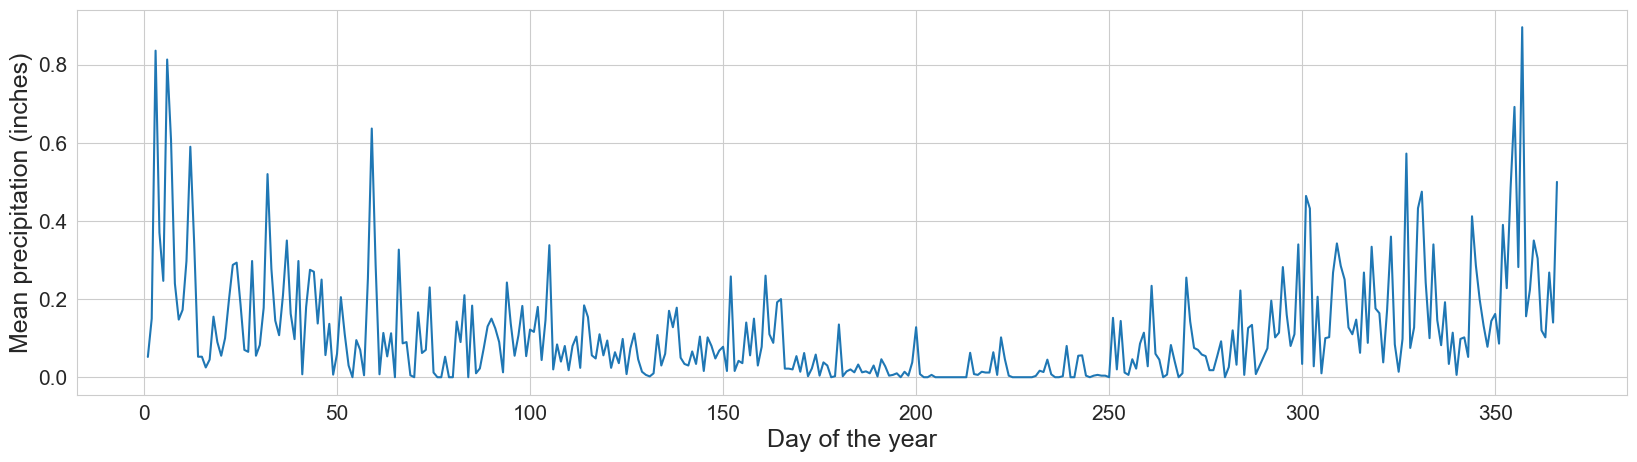

In [688]:
plt.figure(figsize=(20,5))
sns.lineplot(data=mean_day_precipitation_sea, x='day_of_year', y='precipitation')

plt.xlabel('Day of the year', fontsize=18)
plt.ylabel('Mean precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

The output shows the calculated mean precipitation for each day of the year, giving a clear view of seasonal trends.

To create a line plot of the mean daily precipitation for Detroit:

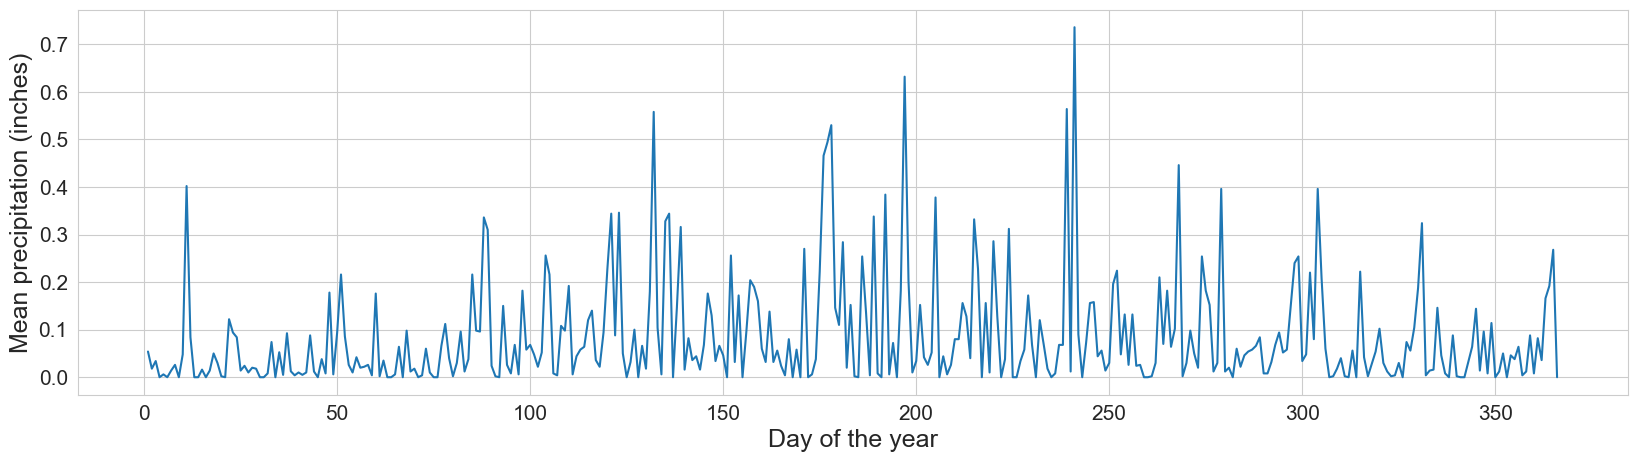

In [689]:
plt.figure(figsize=(20,5))
sns.lineplot(data=mean_day_precipitation_dtw, x='day_of_year', y='precipitation')

plt.xlabel('Day of the year', fontsize=18)
plt.ylabel('Mean precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15)

plt.show()

The output shows the calculated mean precipitation for each day of the year, giving a clear view of seasonal trends.

To to replace the days where we have NaN or missing values with our determined mean values obtained above: 

In [690]:
#indices = np.where(df['precipitation'].isna() == True)[0]

indices_SEA = np.where((df['precipitation'].isna()) & (df['city'] == 'SEA'))[0]

indices_DTW = np.where((df['precipitation'].isna()) & (df['city'] == 'DTW'))[0]

Indices are obtained and assisned to the variables

For each missing precipitation value, we look up the average precipitation for that day of the year across all years and we fill it in: 
Instead of leaving NaNs, we use reasonable estimate based on historical daily averages.

In [691]:
for index in indices_SEA:
    df.loc[index, 'precipitation'] = mean_day_precipitation_sea.loc[df.loc[index, 'day_of_year']].values[0]

for index in indices_DTW:
    df.loc[index, 'precipitation'] = mean_day_precipitation_dtw.loc[df.loc[index, 'day_of_year']].values[0]

This replaces the missing precipitation value at each index with the average precipitation for that day of the year across all years.

To check if we are still missing values or have NaNs under the precipitation column from the data set we check with isna().sum()

In [692]:
df.isna().sum()

date             0
city             0
precipitation    0
day_of_year      0
dtype: int64

We can see from the above output that they all show 0 which indicates that all NaN values have been replaced with the mean value respectively(there are no NaN values).

To export clean .csv file

In [693]:
df.to_csv('clean_seattle_detroit_weather.csv', encoding='utf-8-sig', index=False)

This saves the dataset as clean_seattle_detroit_weather.csv in the current working directory. The encoding='utf-8-sig' ensures compatibility with programs like Excel, and index=False prevents pandas from writing the row indices to the file.

EXPLORATORY DATA ANALYSIS|WEATHER

To create a lineplot of precipitation over time for each city. We can use the lineplot function that is provided by seaborn. 

Note: The hue i.e. the color of each graph is determined by the city. 

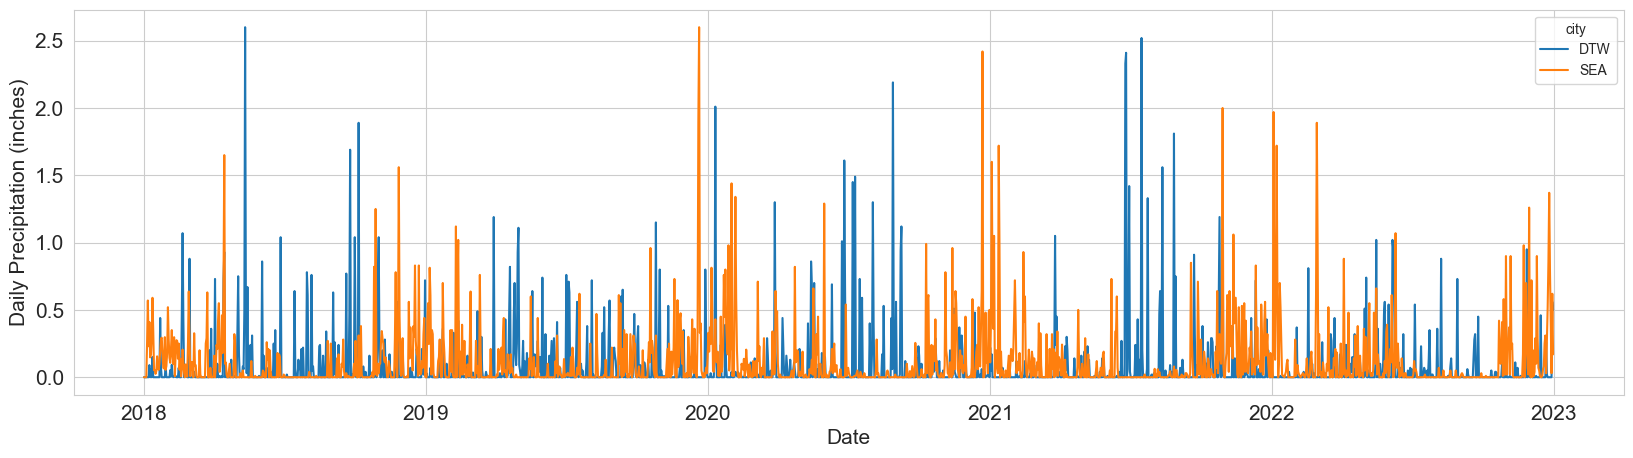

In [694]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='date', y = 'precipitation', hue='city')

plt.xlabel('Date', fontsize=15)
plt.ylabel('Daily Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

The output shows the lineplot for each city over the period of 2018-2022 end. The blue plots represents "DTW" while the orange plots represent "SEA". 
What are some things we can infer from this plot? 

From the line plot, showing daily precipitation (in inches) for the 2 cities , we can make the following inferences:
- There is clear seasonal cycles in both cities, with regular peaks and troughs occuring at consistent intervals each year.


 To compute the descriptive statistics we use the function describe(). 
 We indicate the columns we want are city and precipitation then we groupby in order to splits your dataset into groups based on each unique city then we use .describe() to obtain numerical computations of mean, count, std,max,min,etc.

In [695]:
df[['city', 'precipitation']].groupby('city').describe()

precipitation                                               
             count      mean       std  min  25%   50%   75%  max
city                                                             
DTW         1826.0  0.085308  0.246427  0.0  0.0  0.00  0.04  2.6
SEA         1826.0  0.113270  0.240516  0.0  0.0  0.01  0.12  2.6

Interpreting the output:
- Both cities have 1,826 days of data(approx. 5 years)
- SEA has higher mean precipitation 0.113 inches vs DTW's 0.085 inches. SEA also has higher median by 0.01 inches. This will indicate that SEA gets more precipitation on average. 
- Both cities have similar standard variation although patterns differ
- They both have a day or more where they are no rain. 
- 25% indicates that 25% of days have no precipitation for both cities.
- 50% of days have no precipitation of rain while for sea 50% of days have some rain

- Both cities experience heavy rain events
- They both have similar maximum precipitation. 

Important insights:
- SEA gets more consistent light rain(higher median)
- SEA has slightly more precipitation overall due to higher mean
- Both cities have similar rainfall intensity given their comparable std dev and max values
- DTW has either dry or substantial rain
- Both cities seem to experience seasonal variations

To create a bar plot of the mean daily precipitation for each city. The bar plot can give us some graphical insights into our mean for both cities. 

We first compare mean precipitation values averaged over all days

In [696]:
df[['city', 'precipitation']].groupby('city').mean()

,precipitation
city,
DTW,0.085308
SEA,0.113270


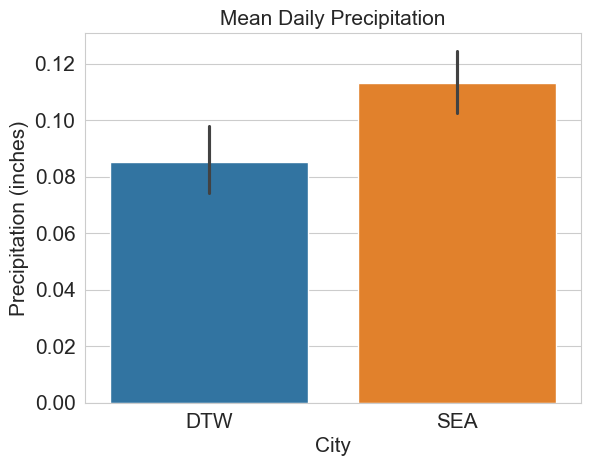

In [697]:


sns.barplot(data=df, x='city', y = 'precipitation', hue='city')

plt.xlabel('City', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)
plt.title('Mean Daily Precipitation', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

The output above shows the barplot representing the mean for our both cities. Some inferences from this basr plot:
- SEA has higher average than DTW.
- The differences between the two cities is visually clear but relatively small. 
- Since the error bars do not overlap, the difference in means between DTW and SEA is statistically significant at the 95% confidence level.


To determine the meaning of the error bar we can use ?. It will provide us some information about the bar chart and some of its metadata. 



In [698]:
sns.barplot?

Signature:
sns.barplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    estimator='mean',
    errorbar=('ci', 95),
    n_boot=1000,
    seed=None,
    units=None,
    weights=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    hue_norm=None,
    width=0.8,
    dodge='auto',
    gap=0,
    log_scale=None,
    native_scale=False,
    formatter=None,
    legend='auto',
    capsize=0,
    err_kws=None,
    ci=<deprecated>,
    errcolor=<deprecated>,
    errwidth=<deprecated>,
    ax=None,
    **kwargs,
)
Docstring:
Show point estimates and errors as rectangular bars.

A bar plot represents an aggregate or statistical estimate for a numeric
variable with the height of each rectangle and indicates the uncertainty
around that estimate using an error bar. Bar plots include 0 in the
axis range, and they are a good choice when 0 is a meaningful value
for the variable to take.

See the :ref:`tutorial 

Output shows that the error bar which indicates a  errorbar=('ci', 95), represents a 95% Confidence Intervals. 

To add a new column to our dataframe indicating the month.
df['date'] will take a column named date and this date is converted into pandas datetimeindex. .month is then used to extract only the months.

In [699]:
df['month'] = pd.DatetimeIndex(df['date']).month

To create a new column which indicates what month it is in form of  numerical data. 

To view first 5 rows of dataframe:

In [700]:
df.head()

,date,city,precipitation,day_of_year,month
0,2018-01-01,DTW,0.0,1,1
1,2018-01-02,DTW,0.0,2,1
2,2018-01-03,DTW,0.0,3,1
3,2018-01-04,DTW,0.0,4,1
4,2018-01-05,DTW,0.0,5,1


The above shows the view of the first few records of our table. We can also see a new column has been labelled 'month' that indicates what month it is in numerical representation. 

To obtain the list of the unique months:

In [701]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

The output shows a list of all unique months. 

To create a box plot of precipitation by month for each city

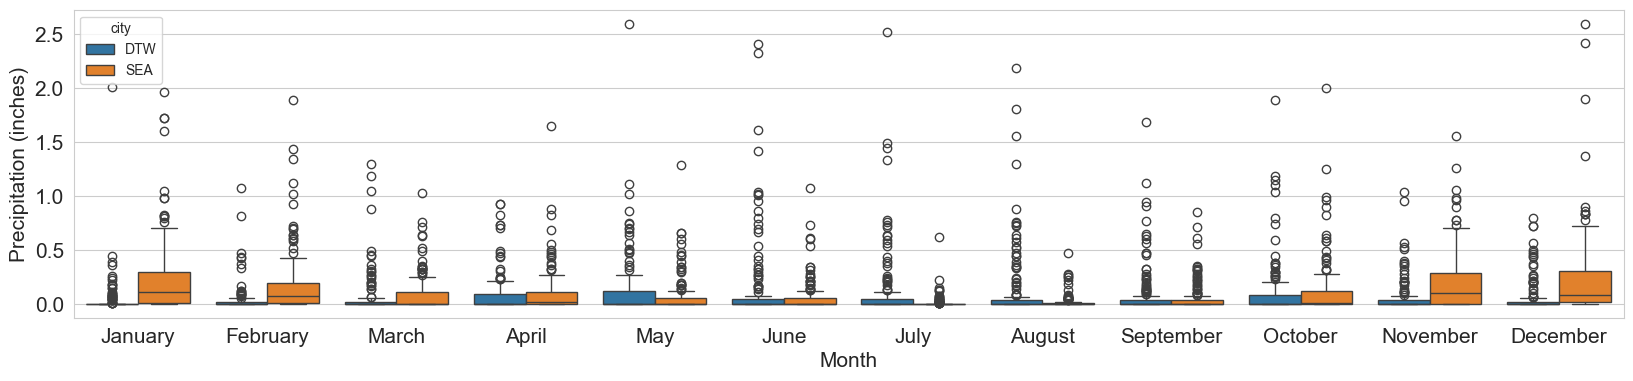

In [702]:
plt.figure(figsize=(20,4))

sns.boxplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=15)
plt.ylabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

#Get month names and set x-axis tick labels
import calendar
month_names = list(calendar.month_name[1:]) #get month names
plt.xticks(ticks=range(12), labels=month_names) #set x-axis ticks to month names

plt.show()

The output shows monthly boxplots of daily precipitation, instead of using mean values as done previously.

The following observations can be made:

- During the winter months (November–February), Seattle shows steady, reliable rainfall, with higher median values and relatively small variability. Detroit has lower precipitation, as reflected by the boxes being closer to 0, likely because it snows in winter while Seattle experiences mostly rain.

- Detroit exhibits more outliers, indicating occasional extreme rainfall events compared to Seattle.

To modify the box plot to adjust orientation and axis limits:

To orient the boxplot horizontally.

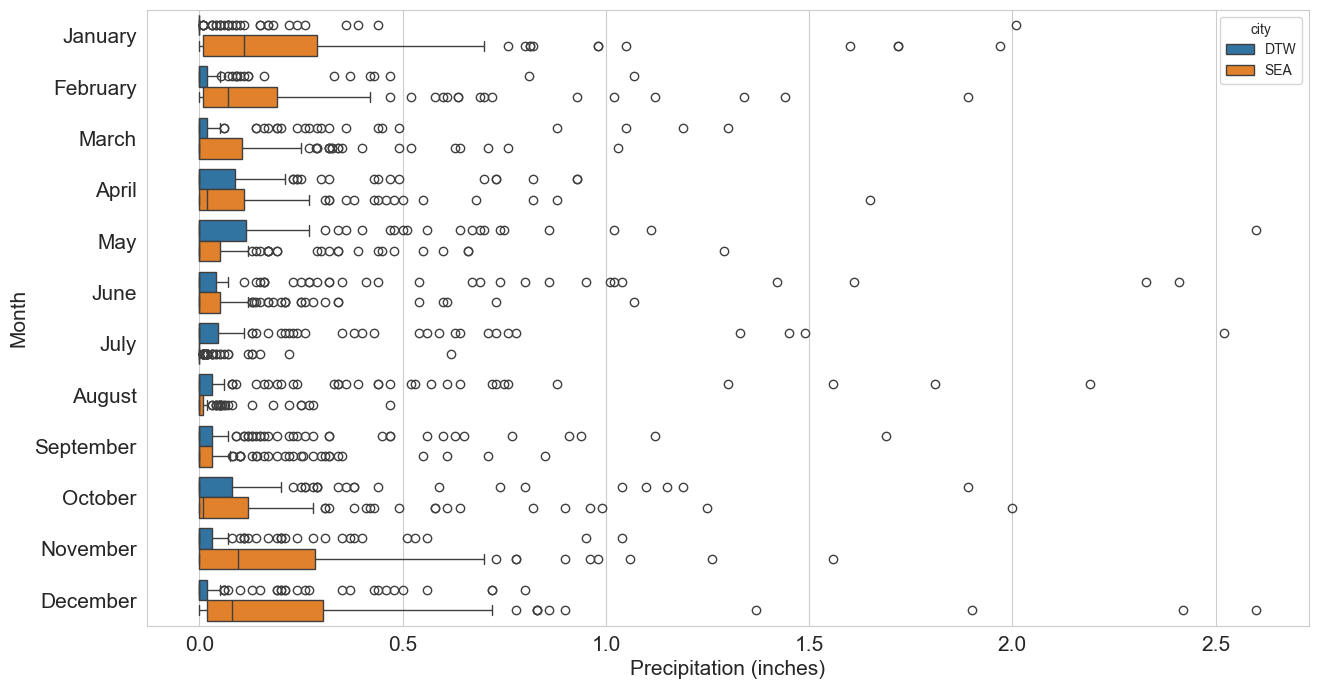

In [703]:
plt.figure(figsize=(15,8))

sns.boxplot(data=df, x='precipitation', y='month', hue='city', orient='h')

plt.ylabel('Month', fontsize=15)
plt.xlabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.yticks(ticks=range(12), labels=month_names)

plt.show()

The output shows the boxplots in another orientation which provides us with more info.

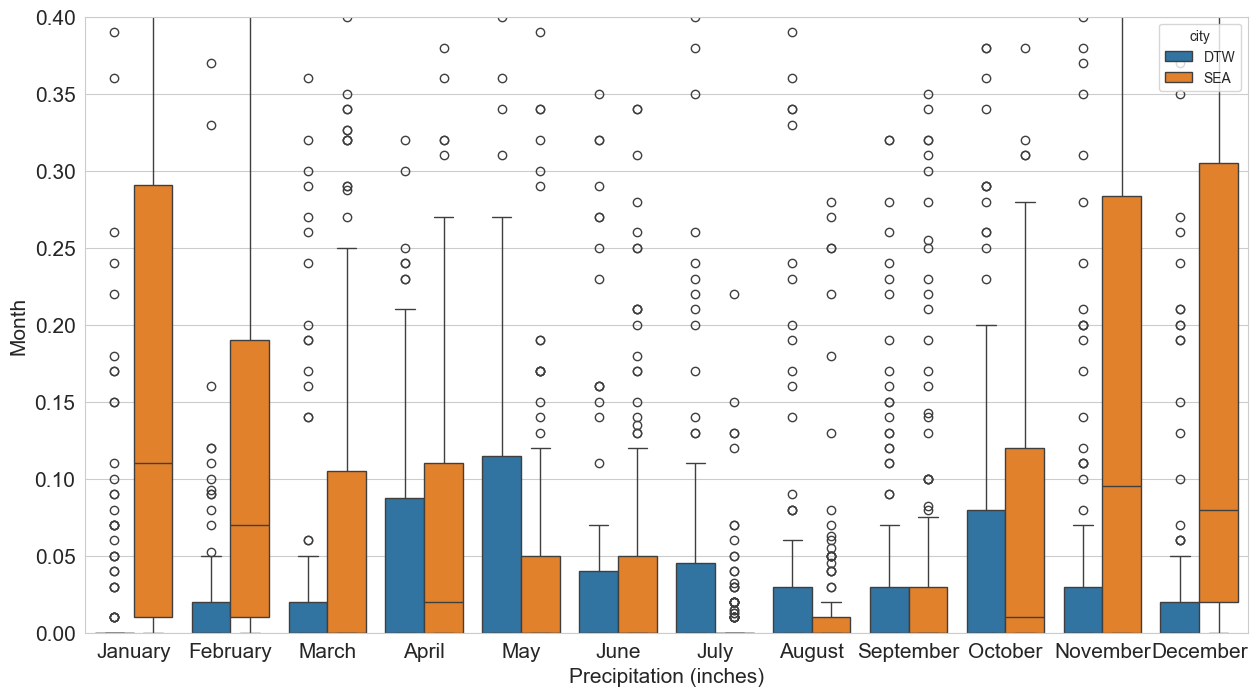

In [704]:
plt.figure(figsize=(15,8))

sns.boxplot(data=df, x='month', y='precipitation', hue='city')

plt.ylabel('Month', fontsize=15)
plt.xlabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names)

plt.ylim(0,0.4)

plt.show()

The output indicates that over the winter months there is much more higher rain in 'SEA' than  in 'DTW'. 

To plot the mean precipitation for each month: (using barplot)

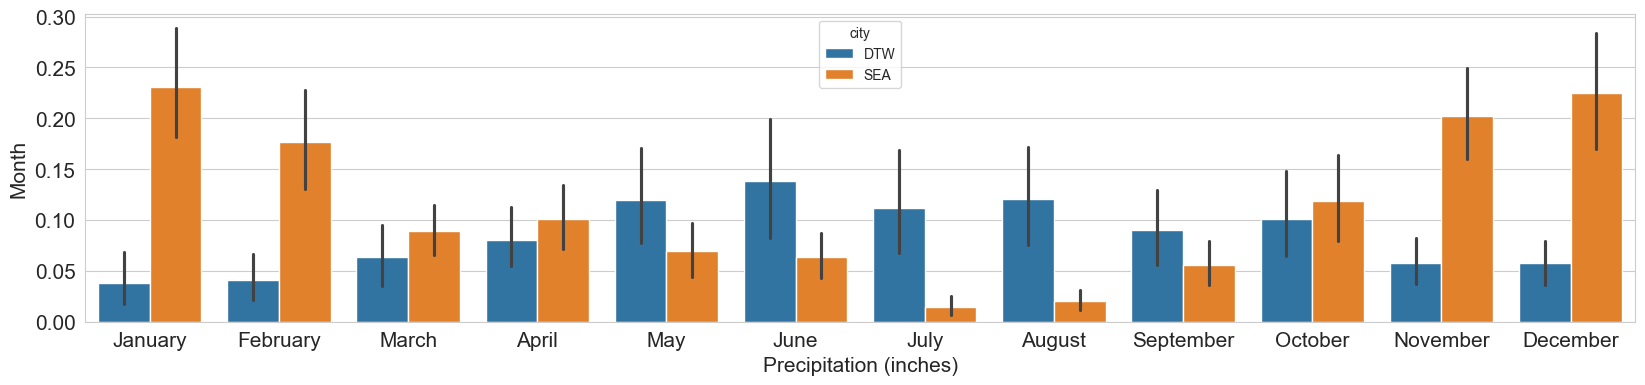

In [705]:
plt.figure(figsize=(20,4))

sns.barplot(data=df, x='month', y='precipitation', hue='city')

plt.ylabel('Month', fontsize=15)
plt.xlabel('Precipitation (inches)', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names)


plt.show()

The output shows a barplot of mean precipitation for each month. 
Some inferences:
- In the winter month, Seattle experiences higher precipitation than Detroit during the Winter months
- In Summer months, Detroit seems to see more precipitation. 

To compute the mean precipitation by city and month using groupby: 

In [706]:
df[['month', 'precipitation', 'city']].groupby(['city', 'month']).mean()

precipitation
city month               
DTW  1           0.038194
     2           0.040762
     3           0.063258
     4           0.080133
     5           0.120000
     6           0.138667
     7           0.112194
     8           0.120774
     9           0.089667
     10          0.101355
     11          0.057733
     12          0.057742
SEA  1           0.230742
     2           0.176472
     3           0.089075
     4           0.100483
     5           0.069161
     6           0.063167
     7           0.013984
     8           0.019995
     9           0.055622
     10          0.118452
     11          0.201867
     12          0.224903

Output shows the mean precipitation for each city and month using the groupby function. For example, we can see in the winter months of Jan, Feb, Dec, November - SEA has way higher mean precipitation than DTW.

To add a new column that indicates whether any precipitaiton occured:

we use df['precipitation'] to select precipitation columns and if there is any precipitation that is greater than 0. 

In [707]:
df['any_precipitation'] = df['precipitation'] > 0 

In [708]:
df

,date,city,precipitation,day_of_year,month,any_precipitation
0,2018-01-01,DTW,0.00,1,1,False
1,2018-01-02,DTW,0.00,2,1,False
2,2018-01-03,DTW,0.00,3,1,False
3,2018-01-04,DTW,0.00,4,1,False
4,2018-01-05,DTW,0.00,5,1,False
...,...,...,...,...,...,...
3647,2022-12-27,SEA,0.78,361,12,True
3648,2022-12-28,SEA,0.40,362,12,True
3649,2022-12-29,SEA,0.03,363,12,True
3650,2022-12-30,SEA,0.62,364,12,True


The output shows our table with the new column with boolean values indicating whether any precpitation occured or not. 

The output shows a new column has been added which indicates whether precipitation occured or not. We can confirm this by
looking at the first and second record, the precipitation is 0.00 hence our results are false. for day_of_year 361, we see precipitation value is 0.78 which yield a true value. 

To calculate and plot the proportion of days with any precipitation:

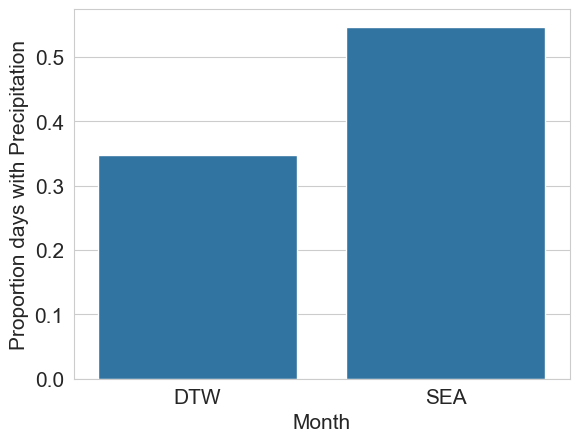

In [709]:


sns.barplot(data=df, x='city', y='any_precipitation', errorbar=None)

plt.xlabel('Month', fontsize=15)
plt.ylabel('Proportion days with Precipitation', fontsize=15)

plt.tick_params(labelsize=15)

plt.show()

From the output, we see that there was more than half of the days where there was precipitation in Seattle and aprox 0.4 where there was rain in DTW. 

To plot the proportion of days with precipitation each month

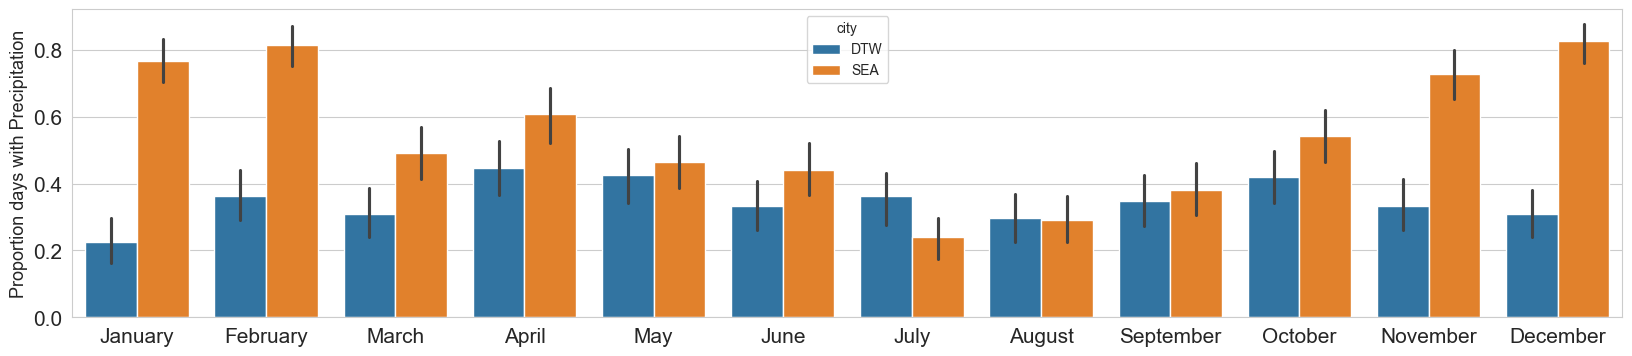

In [710]:
plt.figure(figsize=(20,4))

sns.barplot(data=df, x='month', y='any_precipitation', hue='city')

plt.xlabel(None)
plt.ylabel('Proportion days with Precipitation', fontsize=13)
plt.xticks(ticks=range(12), labels=month_names)

plt.tick_params(labelsize=15)

plt.show()

The output shows the proportion of precipitaiton each month. We see again that the winter months for Seattle have greater precipitations. 

Additional Plots:

To create Pie Chart of Total Precipitation by City:

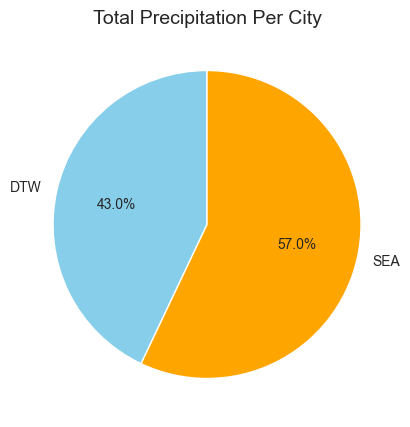

In [711]:
import matplotlib.pyplot as plt

# Sum precipitation for each city
precip_sum = df.groupby("city")["precipitation"].sum()

# Create pie chart
plt.figure(figsize=(5,5))
plt.pie(
    precip_sum,
    labels=precip_sum.index,
    autopct="%1.1f%%",   # ✅ fixed
    startangle=90,
    colors=["skyblue", "orange"]
)
plt.title("Total Precipitation Per City", fontsize=14)
plt.show()


The pie chart shows the total cumulative precipitation for each city over the entire 5 year period and it reveals some insights when compared to previous analysis:
-Pie chart shows seatte's total precipitaiton is 54% compared to Detroit's 43% .
- Although Detroit has heavier rains, Seattle's consistent light rains add up. 


Limitations: 
-There are no indication of seasonal variations.


    

::::::MODELLING::::

To check the precipitation distribution for the 2 cities in a given month(here, January). 
    


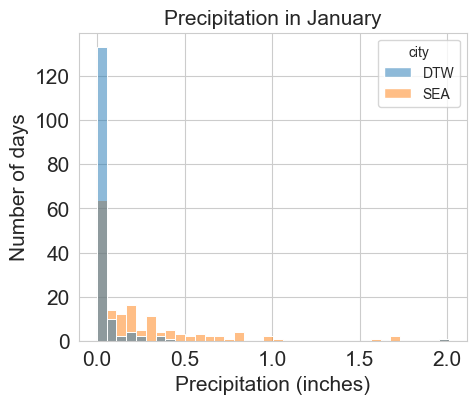

In [712]:
plt.figure(figsize=(5,4))

sns.histplot(data=df.loc[df['month'] == 1], x = 'precipitation', hue='city') #filters dataframe for January
plt.xlabel('Precipitation (inches)', fontsize=15) #define x axis
plt.ylabel('Number of days', fontsize=15) #define y-axis
plt.title('Precipitation in January', fontsize=15)  

plt.tick_params(labelsize=15)
plt.show() 

The above shows the histogram plotted for Precipitation in January for the two cities(DTW = Detroit and SEA = Seattle).
Both distribution are heavily right-skewed. 
Most days have low precipitation (close to 0 inches), and a few days have much higher values that are close to 2 inches. 


Given the large sample size and the fact that we do not know the population standard deviation. The t-test helps determine whether the difference between the means of two groups is statistically significant.

Before we can perform any statistical test, the SciPy library which is a computing library that is built on top of NumPy needs to be installed: 

In [713]:
import sys
print(sys.executable)
!{sys.executable} -m pip install scipy

/opt/miniconda3/bin/python


The output shows that the library has already been installed.

To import the SciPy library:

In [714]:
#importing  scipy stat module for performing statistical test
from scipy import stats


stats module is imported from the scipy library

We can now run a two-sample t-test comparing the mean precipitation between Seattle and Detroit for each month. 
Null Hypothesis(H₀): There is no difference in mean precipitation between Seattle and Detroit.
Alternative Hypothesis: There is a difference between mean precipitation between Seattle and Detroit. 

Our significance level is α=0.05.

This means:

If p-value < 0.05, you reject H₀ → there is a statistically significant difference in mean precipitation between the two cities for that month.

If p-value ≥ 0.05, you fail to reject H₀ → no significant difference detected.
To perform statistic computation: 

In [715]:
significance_level = 0.05
significantly_different = np.zeros(12)

#perform t-test for each month

for month in range(1,13):
    #Get precipitaiton data for Seattle and Detroit for the current month
    sea_data = df.loc[(df['city'] == 'SEA') & (df['month'] == month), 'precipitation']
    dtw_data = df.loc[(df['city'] == 'DTW') & (df['month'] == month), 'precipitation']

    t_statistic, p_value = stats.ttest_ind(sea_data, dtw_data, equal_var=False)

    if p_value < significance_level:
        significantly_different[month-1] = 1

        print(f"Month {month}:")
        print(f" t-statistic = {t_statistic:.2f}")
        print(f" p-value t test = {p_value: .3f}")
        print("-" * 20)

Month 1:
 t-statistic = 6.25
 p-value t test =  0.000
--------------------
Month 2:
 t-statistic = 4.94
 p-value t test =  0.000
--------------------
Month 6:
 t-statistic = -2.28
 p-value t test =  0.024
--------------------
Month 7:
 t-statistic = -3.79
 p-value t test =  0.000
--------------------
Month 8:
 t-statistic = -3.81
 p-value t test =  0.000
--------------------
Month 11:
 t-statistic = 5.58
 p-value t test =  0.000
--------------------
Month 12:
 t-statistic = 5.13
 p-value t test =  0.000
--------------------


The sign of the t-statistic (positive or negative) indicates which city tends to have higher mean precipitation:

Positive t-statistic: SEA mean > DTW mean

Negative t-statistic: DTW mean > SEA mean

From your results:

Months 1, 2, 11, 12 → Seattle has higher mean precipitation.

Months 6, 7, 8 → Detroit has higher mean precipitation.
  
The two-sample t-test conducted to compare mean monthly precipitation between Seattle and Detroit. Using a significance level of 0.05, results indicate that the two cities differ significantly during January, February, June, July, August, November, December. For other months, there is no statistically significant difference in mean precipitaiton between the two cities. 

To confirm the above we can also plot the mean precipitation for each month for both cities and include a star(*) where there are siignificant differences.

In [716]:
df

,date,city,precipitation,day_of_year,month,any_precipitation
0,2018-01-01,DTW,0.00,1,1,False
1,2018-01-02,DTW,0.00,2,1,False
2,2018-01-03,DTW,0.00,3,1,False
3,2018-01-04,DTW,0.00,4,1,False
4,2018-01-05,DTW,0.00,5,1,False
...,...,...,...,...,...,...
3647,2022-12-27,SEA,0.78,361,12,True
3648,2022-12-28,SEA,0.40,362,12,True
3649,2022-12-29,SEA,0.03,363,12,True
3650,2022-12-30,SEA,0.62,364,12,True


To perform a statistical test for differences in proportions of days with any precipitation each month between the cities

We start by importing statsmodels but first we must import sys then install our library

In [717]:
import sys
!{sys.executable} -m pip install statsmodels

From the output, we see that our library has installed successfully

Recall from the above that we create a new column labelled any_precipitaiton that used boolean logic (true/false) to indicate if there was any precipitation on a particular date our not. We can also use a proportion z-test to compare the precipitation between the two cities for each month. We need to create a contingency table that keeps track of the number of trues and false in order to use it for statistical computation. 

In [718]:
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest  # Import the missing function

significance_level = 0.05
significantly_different_proportion = np.zeros(12)

#Perform t-test for each month
for month in range(1,13):

    #Create a contingency table for Seattle and Detroit for current month:
    contingency_table = pd.crosstab(
        df.loc[df['month'] == month, 'city'], df.loc[df['month'] == month, 'any_precipitation']
    )

    #Calculate the number of True values (days with precipitation) for each city
    days_with_precipitation = contingency_table[True]

    #Calculate the total number of days of each city
    total_counts = contingency_table.sum(axis=1)

    #Hypothesis test
    zstat, pvalue = proportions_ztest(
        count=days_with_precipitation, nobs=total_counts, alternative='two-sided'
    )

    # Fixed variable names: p_value -> pvalue and signficance_level -> significance_level
    if pvalue < significance_level:
        significantly_different_proportion[month-1]=1

    print(f"Month {month}:")
    print(f" z-statistic = {zstat:.2f}")
    print(f" p-value = {pvalue:.3f}")  # Fixed variable name
    print("-" * 20)
    

Month 1:
 z-statistic = -9.54
 p-value = 0.000
--------------------
Month 2:
 z-statistic = -7.75
 p-value = 0.000
--------------------
Month 3:
 z-statistic = -3.25
 p-value = 0.001
--------------------
Month 4:
 z-statistic = -2.78
 p-value = 0.006
--------------------
Month 5:
 z-statistic = -0.69
 p-value = 0.493
--------------------
Month 6:
 z-statistic = -1.90
 p-value = 0.058
--------------------
Month 7:
 z-statistic = 2.35
 p-value = 0.019
--------------------
Month 8:
 z-statistic = 0.12
 p-value = 0.901
--------------------
Month 9:
 z-statistic = -0.60
 p-value = 0.548
--------------------
Month 10:
 z-statistic = -2.16
 p-value = 0.031
--------------------
Month 11:
 z-statistic = -6.83
 p-value = 0.000
--------------------
Month 12:
 z-statistic = -9.17
 p-value = 0.000
--------------------


The output shows the results of monthly proportion z-tests comparing precipitation occurrence between Seattle and Detroit. The analysis reveals a distinct seasonal pattern in the statistical significance of precipitation differences between the two cities. During the winter and spring months (January through April), the tests show statistically significant differences in precipitation frequency, with p-values ranging from 0.000 to 0.008, all well below the 0.05 significance threshold. 

To create a bar plot showing the proportion of days with any precipitation each month with a star(*) that indicates the months with signficant differences:

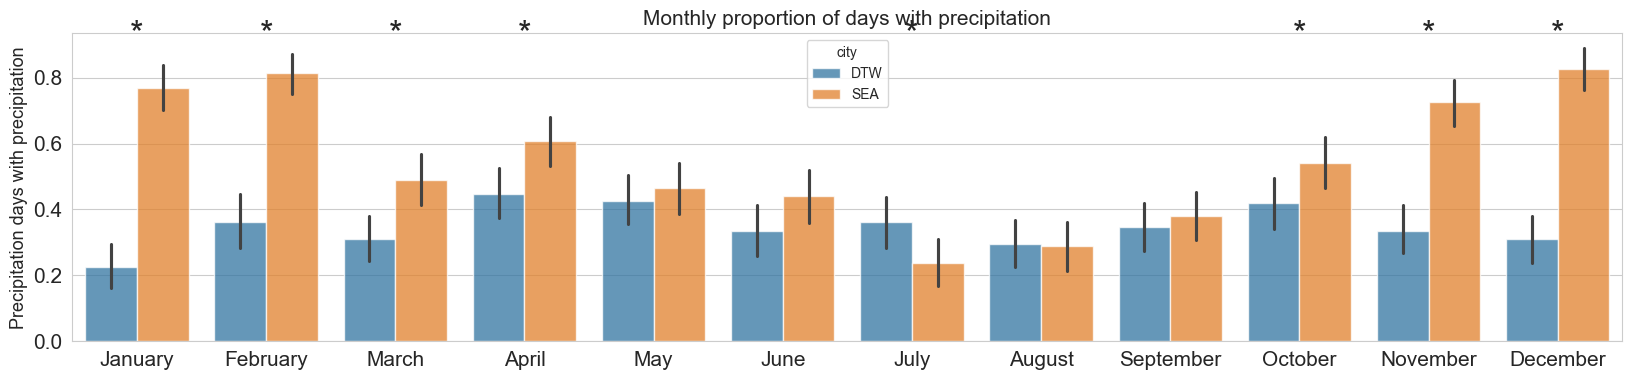

In [719]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure(figsize=(20,4))

sns.barplot(data=df, x='month', y='any_precipitation', hue='city', alpha=0.75)

plt.xlabel(None)
plt.ylabel('Precipitation days with precipitation', fontsize=13)
plt.title('Monthly proportion of days with precipitation', fontsize=15)

plt.tick_params(labelsize=15)

plt.xticks(ticks=range(12), labels=month_names)

#Add starts for significantly different months
for month in range(12):
    if significantly_different_proportion[month] ==1:

        #add a star
        plt.text(month,0.9, '*', ha='center', fontsize=25)
plt.show()

The output shows our bar chart that compares the monthly  proportion of days with precipitation in both cities. This can aid in backing up the z-test that was perfomed. The chart plots the month of the year on the x-axis and proportion of rainy days are on the y-axis, the two bars on each month represent the cities with (blue for DTW and orange for Seattle). There's a star which marks the months where there is significant differences bettween precipitation frequency. 
Based on the output, we can see that there is Signficant differences in the months - January, February, March, April, October, November, December. 